In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [25]:
df = pd.read_csv('../data/cleaned.csv')


In [26]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [27]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  ...  letter1_int  letter

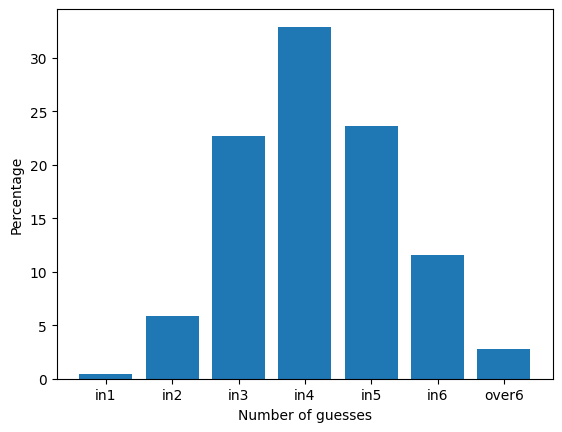

In [5]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')


plt.show()

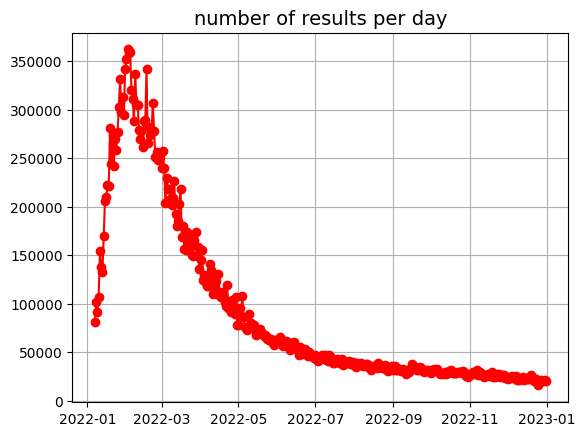

In [6]:
plt.plot(df['date'], df['num_results'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


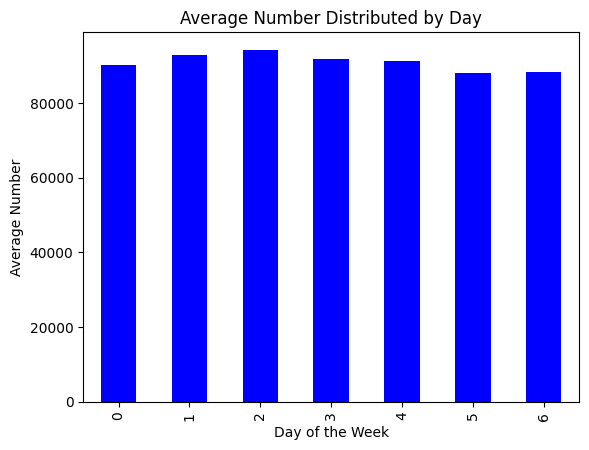

In [7]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number')
plt.title('Average Number Distributed by Day')
plt.show()


In [8]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
11:15:42 - cmdstanpy - INFO - Chain [1] start processing
11:15:42 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
719,2023-12-27,-22066.974175,-1.110459e+06,982073.435700,-1.110269e+06,970537.836978,3553.637636,3553.637636,3553.637636,3553.637636,3553.637636,3553.637636,0.0,0.0,0.0,-18513.336539
720,2023-12-28,-22183.862342,-1.109856e+06,981549.226274,-1.117109e+06,971851.934566,1398.376321,1398.376321,1398.376321,1398.376321,1398.376321,1398.376321,0.0,0.0,0.0,-20785.486020
721,2023-12-29,-22300.750508,-1.114257e+06,977863.615003,-1.121523e+06,971055.145896,416.535612,416.535612,416.535612,416.535612,416.535612,416.535612,0.0,0.0,0.0,-21884.214897
722,2023-12-30,-22417.638675,-1.126238e+06,973472.684166,-1.124846e+06,972342.116072,-2497.676414,-2497.676414,-2497.676414,-2497.676414,-2497.676414,-2497.676414,0.0,0.0,0.0,-24915.315089
723,2023-12-31,-22534.526841,-1.130375e+06,984059.804241,-1.128520e+06,979548.459029,-3481.612902,-3481.612902,-3481.612902,-3481.612902,-3481.612902,-3481.612902,0.0,0.0,0.0,-26016.139743


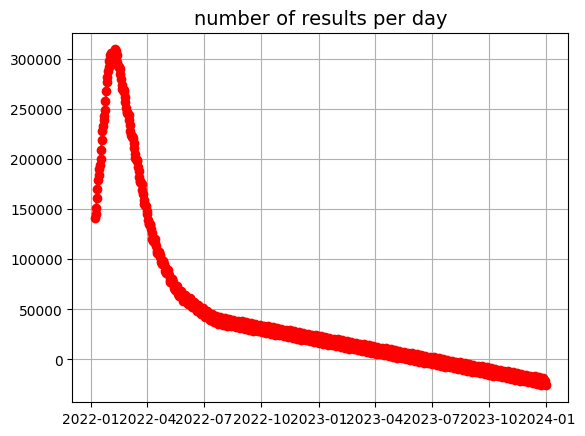

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,13116.363957,-46837.189159,83124.516655,-47839.288746,75084.024204,3553.637636,3553.637636,3553.637636,3553.637636,3553.637636,3553.637636,0.0,0.0,0.0,16670.001593


In [9]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


11:15:42 - cmdstanpy - INFO - Chain [1] start processing
11:15:42 - cmdstanpy - INFO - Chain [1] done processing


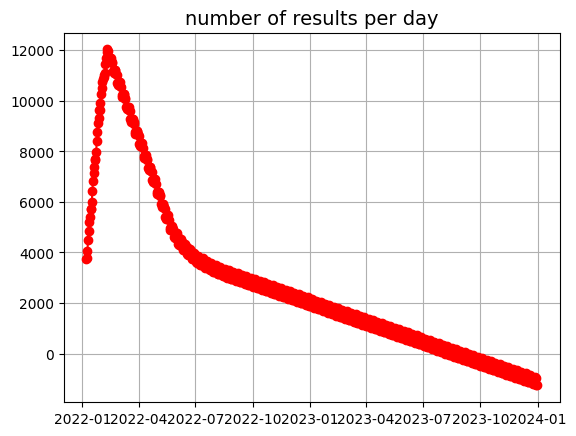

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1536.912212,-439.062542,3980.618561,-265.506195,3433.12517,140.490461,140.490461,140.490461,140.490461,140.490461,140.490461,0.0,0.0,0.0,1677.402674


In [ ]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


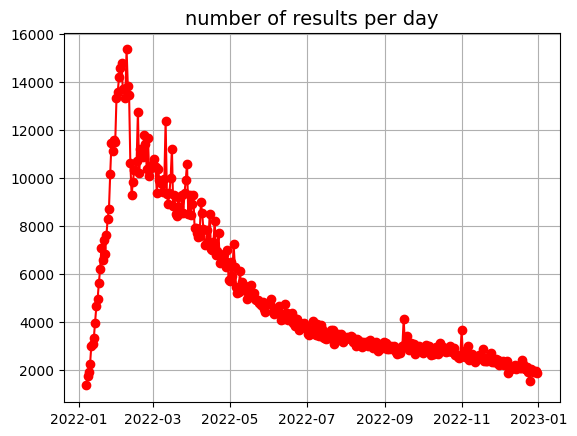

In [11]:
plt.plot(df['date'], df['num_hardmode'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


In [12]:
print(df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/gm/phwm98352tj19cnh_y_nt3n80000gn/T/ipykernel_35702/3992753031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

     in4  in5  ...  letter1_int  letter2_int  letter3_int letter4_int  \
0     37   29  ...           13            1           14          12   
1     38   26  ...           13           15           12           1   
2     38   30  ...            8            1           22          15   
3     40   25  ...            9           13           16           5   
4     35   29  ...            3           15           14           4   
..   ...  ...  ...          ...          ...          ...

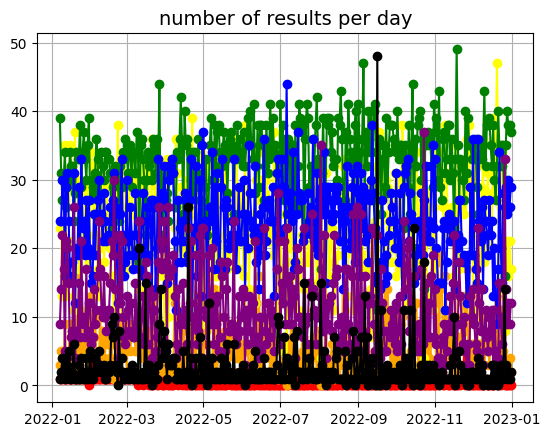

In [13]:
plt.plot(df['date'], df['in1'], color='red', marker='o')
plt.plot(df['date'], df['in2'], color='orange', marker='o')
plt.plot(df['date'], df['in3'], color='yellow', marker='o')
plt.plot(df['date'], df['in4'], color='green', marker='o')
plt.plot(df['date'], df['in5'], color='blue', marker='o')
plt.plot(df['date'], df['in6'], color='purple', marker='o')
plt.plot(df['date'], df['over6'], color='black', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


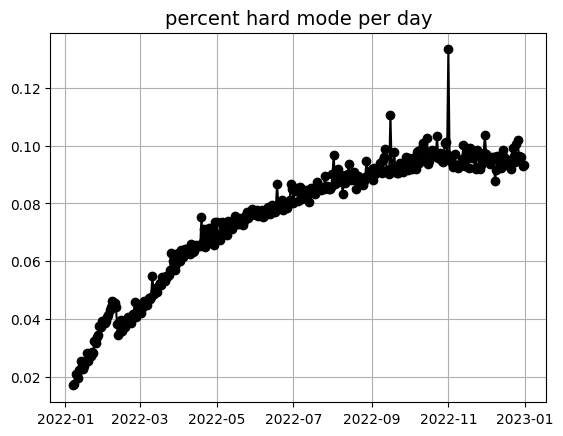

,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,in5,...,letter2_int,letter3_int,letter4_int,letter5_int,avg_num_guesses,word_score,word_occurrence,vowels,repeats,percent_hard


In [14]:
df["percent_hard"] = df.apply(
    lambda row: row["num_hardmode"]/row["num_results"], axis=1)

plt.plot(df['date'], df['percent_hard'], color='black', marker='o')
plt.title('percent hard mode per day', fontsize=14)
plt.grid(True)
plt.show()


df[df["percent_hard"] > 0.5]


In [32]:
from fitter import Fitter
print(df)
f = Fitter(df["num_results"].values, df["contest_num"].values)
f.fit()
print(f.summary())
f.plot_pdf()

f = Fitter(df["percent_hard"].values, df["contest_num"].values)
f.fit()
print(f.summary())
f.plot_pdf()


          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  ...  letter2_int  letter

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Cluster 0
Mean word score results: 1.348062712279306
Mean average number of guesses: 4.156647727272727
Mean word occuraence: 0.012115481664328675


Cluster 1
Mean word score results: 1.3261015574798813
Mean average number of guesses: 4.72875
Mean word occuraence: 0.005450028919988113


Cluster 2
Mean word score results: 1.6004868111038286
Mean average number of guesses: 3.761578947368421
Mean word occuraence: 0.027392642570865364




c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_5568\3992753031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


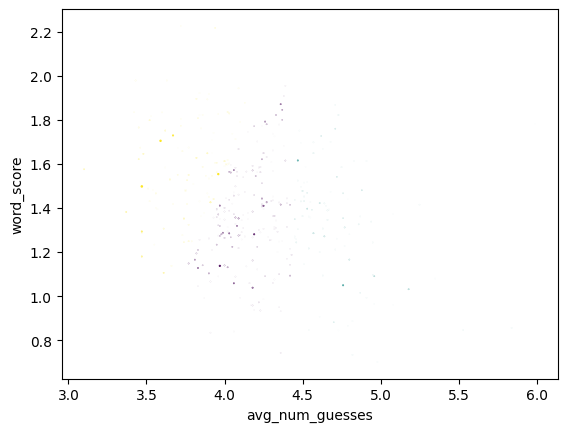

In [15]:
from sklearn.cluster import KMeans
import matplotlib.dates as dates
df_kmeans = df[["word_score", "avg_num_guesses", "word_occurrence"]]
# word_score,avg_num_guesses,word_occurrence
kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean word score results:',
          cluster_data['word_score'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('Mean word occuraence:', 
          cluster_data['word_occurrence'].mean())
    print('\n')

plt.scatter(df_kmeans['avg_num_guesses'],
            df_kmeans['word_score'], 
            df_kmeans['word_occurrence'],
            c=df_kmeans['cluster'])
plt.xlabel('avg_num_guesses')
plt.ylabel('word_score')
plt.show()


In [17]:
from fitter import Fitter, get_common_distributions, get_distributions
cols = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']
in1 = [1 for _ in range(sum([length for length in df.in1.to_numpy()]))]
in2 = [2 for _ in range(sum([length for length in df.in2.to_numpy()]))]
in3 = [3 for _ in range(sum([length for length in df.in3.to_numpy()]))]
in4 = [4 for _ in range(sum([length for length in df.in4.to_numpy()]))]
in5 = [5 for _ in range(sum([length for length in df.in5.to_numpy()]))]
in6 = [6 for _ in range(sum([length for length in df.in6.to_numpy()]))]
over6 = [7 for _ in range(sum([length for length in df.over6.to_numpy()]))]

total_guesses = in1 + in2 + in3 + in4 + in5 + in6 + over6
result = stats.kstest(total_guesses, stats.norm.cdf)

plt.hist(total_guesses, bins = 7)
f = Fitter(total_guesses, distributions=get_distributions())
f.fit()
f.summary()


Fitting 110 distributions:  15%|█▌        | 17/110 [00:28<05:54,  3.82s/it]SKIPPED crystalball distribution (taking more than 30 seconds)
SKIPPED burr distribution (taking more than 30 seconds)
Fitting 110 distributions:  16%|█▋        | 18/110 [00:30<04:56,  3.22s/it]SKIPPED betaprime distribution (taking more than 30 seconds)
SKIPPED burr12 distribution (taking more than 30 seconds)
Fitting 110 distributions:  18%|█▊        | 20/110 [00:30<02:42,  1.80s/it]SKIPPED alpha distribution (taking more than 30 seconds)
SKIPPED erlang distribution (taking more than 30 seconds)
Fitting 110 distributions:  20%|██        | 22/110 [00:30<01:38,  1.12s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED exponweib distribution (taking more than 30 seconds)
Fitting 110 distributions:  20%|██        | 22/110 [00:30<02:02,  1.39s/it]SKIPPED f distribution (taking more than 30 seconds)

SKIPPED foldcauchy distribution (taking more than 30 seconds)
SKIPPED fisk distribution (taking more 

KeyboardInterrupt: 

SKIPPED genexpon distribution (taking more than 30 seconds)
SKIPPED genextreme distribution (taking more than 30 seconds)
SKIPPED gengamma distribution (taking more than 30 seconds)
SKIPPED genhalflogistic distribution (taking more than 30 seconds)
SKIPPED genhyperbolic distribution (taking more than 30 seconds)
SKIPPED geninvgauss distribution (taking more than 30 seconds)


Error in callback <function flush_figures at 0x00000277E564C7C0> (for post_execute):


SKIPPED gennorm distribution (taking more than 30 seconds)
SKIPPED genpareto distribution (taking more than 30 seconds)


KeyboardInterrupt: 

In [18]:
print(len(total_guesses))


2513


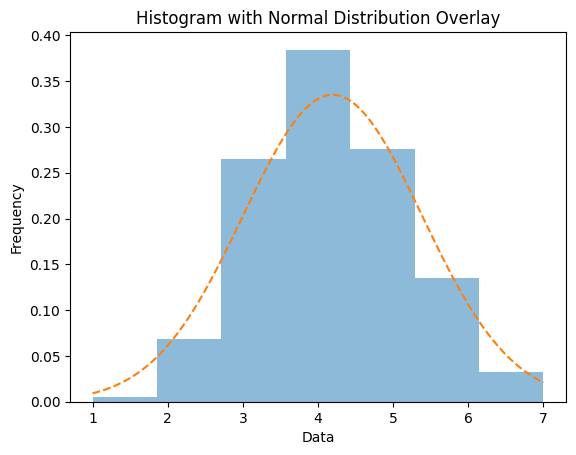

In [19]:
n, bins, patches = plt.hist(total_guesses, bins=7, density=True, alpha=0.5)

# Overlay a normal distribution on top of the histogram
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(bins), max(bins), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, '--')

# Add labels and a title to the plot
plt.xlabel('Data')
plt.ylabel('Frequency')
plt.title('Histogram with Normal Distribution Overlay')

# Display the plot
plt.show()


In [ ]:
# Create histogram
plt.hist(total_guesses, bins=7, density=True)

# Add normal distribution curve
mu, sigma = np.mean(total_guesses), np.std(total_guesses)
x = np.linspace(min(total_guesses), max(total_guesses), 100)
y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
plt.plot(x, y, color='red')

# Set labels and title
plt.xlabel('Total Guesses')
plt.ylabel('Frequency')
plt.title('Histogram of Total Guesses with Normal Distribution')

# Show plot
plt.show()


In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Create a figure and a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the scatter points
ax.scatter(df_kmeans['avg_num_guesses'],
           df_kmeans['word_score'],
           df_kmeans['word_occurrence'],
           c=df_kmeans['cluster'])

# Set the axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()


In [ ]:
df_stacked_bar = df[['date', 'in1','in2','in3','in4','in5','in6','over6']]

df_stacked_bar = df_stacked_bar.set_index('date').sort_index()

# Create a stacked bar chart
df_stacked_bar.plot(kind='bar', stacked=True, figsize=(30, 6))

# Set the y-axis label to 'Percentage'
plt.ylabel('Percentage')
plt.xticks(range(1,350,20))
# Show the plot
plt.show()


In [ ]:
df_kmeans[df_kmeans.cluster == 1].avg_num_guesses

In [ ]:
boxplot_df = [df_kmeans[df_kmeans.cluster == 0].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 1].avg_num_guesses,
              df_kmeans[df_kmeans.cluster == 2].avg_num_guesses]

plt.boxplot(boxplot_df)
plt.title('Boxplot for average number of guesses for three clusters')
plt.show()

In [ ]:
df


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

df = pd.concat((df, df_kmeans["cluster"]), axis=1)

print(df)
# Create a new column indicating the number of unique letters in each solution word
df["unique_letters"] = df["word"].apply(
    lambda x: len(set(x)))

# Split the data into training and testing sets
X = df[["unique_letters"]]
y = df["cluster"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
# print("Confusion matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("Classification report:")
# print(classification_report(y_test, y_pred))

# Use the model to classify the word "EERIE"
word = "EERIE"
unique_letters = len(set(word))
difficulty = clf.predict([[unique_letters]])[0]

# Print the predicted difficulty of the word "EERIE"
print(f"The predicted difficulty of the word '{word}' is {difficulty}.")


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import joblib

# Define the features and target variables
features = ['word_score',  'word_occurrence',  'vowels', 'repeats']
targets = 'avg_num_guesses'

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define the grid search object
grid_search = GridSearchCV(rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Train the grid search object
grid_search.fit(train_df[features], train_df[targets])

# Export the grid search model
joblib.dump(grid_search, 'avg_guesses_model.joblib')

# Make predictions on the test set
predictions = grid_search.predict(test_df[features])

# Print the mean absolute error
mae = np.mean(np.abs(predictions - test_df[targets]))
print(f"MAE: {mae}")

# Print the best hyperparameters found by the grid search
print(f"Best hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
MAE: 0.2939542792084763
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Define the features and target variables
features = ['avg_num_guesses']
targets = ['in1', 'in2', 'in3', 'in4',
           'in5', 'in6', 'over6']

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Define the grid search object
grid_search = GridSearchCV(rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Train the grid search object
grid_search.fit(train_df[features], train_df[targets])

# Export the grid search model
joblib.dump(grid_search, 'guesses_distribution_model.joblib')

# Make predictions on the test set
predictions = grid_search.predict(test_df[features])

# Print the mean absolute error for each target variable
for i, target in enumerate(targets):
    mae = np.mean(np.abs(predictions[:, i] - test_df[target]))
    print(f"MAE for {target}: {mae}")

# Print the best hyperparameters found by the grid search
print(f"Best hyperparameters: {grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
MAE for in1: 0.5007216496079887
MAE for in2: 1.6913680331283407
MAE for in3: 1.911071027819311
MAE for in4: 2.8980215807915948
MAE for in5: 1.9227926017228012
MAE for in6: 1.3754936569056735
MAE for over6: 1.2549425913926688
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [28]:
print(predictions)


[[ 0.52506416  7.37763287 28.80151951 34.47984124 19.94432196  7.66169572
   1.26231585]
 [ 0.2582855   5.43242953 26.42752863 36.21077247 21.92115275  8.32414165
   1.20500753]
 [ 1.953094   17.02282219 36.38928784 28.72326629 11.9151457   3.65780196
   0.53148402]
 [ 0.2140922   4.3133009  19.51249655 34.27522891 26.86895065 12.04738002
   2.28646958]
 [ 1.953094   17.02282219 36.38928784 28.72326629 11.9151457   3.65780196
   0.53148402]
 [ 0.06052177  2.12643286 10.76852276 24.76837137 31.18763048 23.22837251
   7.9575814 ]
 [ 0.3441241   6.37665909 21.69365981 32.93193579 24.60149495 11.74844661
   2.30786544]
 [ 0.74268861  9.66930759 31.9538636  33.50389341 17.07691337  5.8200659
   1.01008209]
 [ 0.17149016  5.74155059 27.29658558 36.39643043 21.69576763  7.40250389
   1.03696592]
 [ 0.74832151  9.21952866 31.92956044 33.86572872 17.2378868   5.8611179
   0.95187876]
 [ 0.35046941  2.81438218 13.33454974 29.11844525 31.02258434 19.1265864
   4.44196602]
 [ 0.2433866   2.9186928